# Wells

A tutorial on `Wells` component.

### Content
* [Basic properties](#Basic-properties)
* [Tree transformations](#Tree-transformations)
* [Blocks evaluation](#Blocks-evaluation)
* [Production rates](#Production-rates)

## Basic properties

Required imports:

In [1]:
import sys
import numpy as np
sys.path.append('..')

from deepfield import Field, Wells

For demonstration, we will use the `Norne` reservoir model that should be downloaded separately, for example, from the `opm-data` repository https://github.com/OPM/opm-data/tree/master/norne. Once the source files of the reservoir model are obtained, load the model data:

In [2]:
model = Field(path='path/to/NORNE_ATW2013.DATA').load()

INFO:Field:Using default config.
INFO:Field:Start reading NORNE_ATW2013.DATA
INFO:Field:[NORNE_ATW2013.DATA:11] Loading DIMENS
INFO:Field:[NORNE_ATW2013.DATA:19] Loading OIL
INFO:Field:[NORNE_ATW2013.DATA:21] Loading WATER
INFO:Field:[NORNE_ATW2013.DATA:23] Loading GAS
INFO:Field:[NORNE_ATW2013.DATA:25] Loading DISGAS
INFO:Field:[NORNE_ATW2013.DATA:27] Loading VAPOIL
INFO:Field:[NORNE_ATW2013.DATA:32] Loading METRIC
INFO:Field:[NORNE_ATW2013.DATA:37] Loading START
INFO:Field:[NORNE_ATW2013.DATA:128] Loading MAPAXES
...
INFO:Field:[BC0407_HIST01122006.SCH:9522] Loading WCONINJE
INFO:Field:[BC0407_HIST01122006.SCH:9532] Loading DATES
INFO:Field:[BC0407_HIST01122006.SCH:9554] Loading WCONINJE
INFO:Field:[BC0407_HIST01122006.SCH:9563] Loading DATES
INFO:Field:Finish reading BC0407_HIST01122006.SCH
INFO:Field:Finish reading NORNE_ATW2013.DATA
                PVTG table will be converted into PVDG one.
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, DIMENS, COORD, Z

Wells can be quickly visualized using `show_wells` (hint: uncomment `%matplotlib notebook` to enable interactive mode):

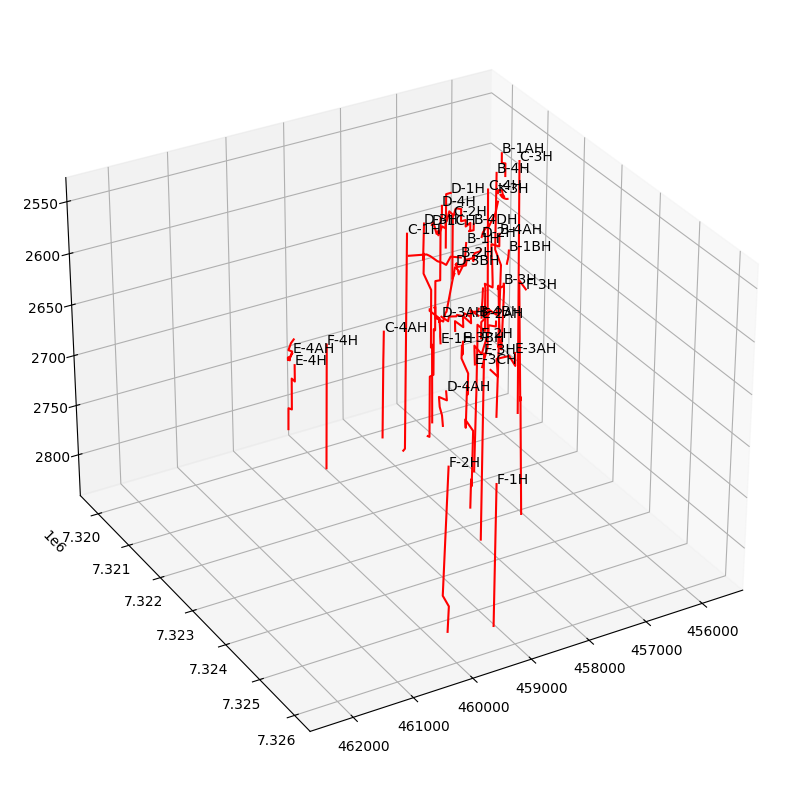

In [3]:
# %matplotlib notebook
model.wells.show_wells(figsize=(10, 10))

Under the hood of the component, wells are organized in a tree. Root is a Field itself, nodes are groups of wells or well segments:

In [4]:
model.wells.render_tree()

FIELD
|-- INJE
|   |-- MANI-C
|   |   |-- C-4H
|   |   |-- C-1H
|   |   |-- C-2H
|   |   |-- C-3H
|   |   +-- C-4AH
|   |-- MANI-F
|   |   |-- F-1H
|   |   |-- F-2H
|   |   |-- F-3H
|   |   +-- F-4H
|   +-- WI-GSEG
+-- PROD
    |-- MANI-B2
    |   |-- B-1H
    |   |-- B-3H
    |   |-- B-1AH
    |   +-- B-1BH
    |-- MANI-B1
    |   |-- MANI-K1
    |   +-- B1-DUMMY
    |       |-- B-2H
    |       |-- B-4H
    |       |-- B-4AH
    |       |-- B-4BH
    |       +-- B-4DH
    |-- MANI-D1
    |   |-- D-1H
    |   |-- D-3H
    |   |-- D-3AH
    |   |-- D-1CH
    |   +-- D-3BH
    |-- MANI-D2
    |   |-- MANI-K2
    |   |   +-- K-3H
    |   +-- D2-DUMMY
    |       |-- D-2H
    |       |-- D-4H
    |       +-- D-4AH
    |-- MANI-E1
    |   |-- E-3H
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   +-- E-3CH
    +-- MANI-E2
        |-- E-2H
        |-- E-4H
        |-- E-4AH
        +-- E-2AH


Nodes of tree can be accessed by names, e.g.:

In [5]:
model.wells['C-4H']

Node's `name` is a short name, while `fullname` includes parents up to the root:

In [6]:
print('Name:', model.wells['C-4H'].name)
print('Fullname:', model.wells['C-4H'].fullname)

Name: C-4H
Fullname: INJE/MANI-C/C-4H


One can iterate over tree to get all well segments (groups are excluded be default):

In [7]:
np.array([node.name for node in model.wells])

array(['C-4H', 'C-1H', 'C-2H', 'C-3H', 'C-4AH', 'F-1H', 'F-2H', 'F-3H',
       'F-4H', 'B-1H', 'B-3H', 'B-1AH', 'B-1BH', 'B-2H', 'B-4H', 'B-4AH',
       'B-4BH', 'B-4DH', 'D-1H', 'D-3H', 'D-3AH', 'D-1CH', 'D-3BH',
       'K-3H', 'D-2H', 'D-4H', 'D-4AH', 'E-3H', 'E-1H', 'E-3AH', 'E-3BH',
       'E-3CH', 'E-2H', 'E-4H', 'E-4AH', 'E-2AH'], dtype='<U5')

Nodes have attributes:

In [8]:
model.wells['C-4H'].attributes

('WELSPECS', 'COMPDAT', 'WCONINJE', 'WELLTRACK')

Example of the `COMPDAT` table:

In [9]:
model.wells['C-4H'].compdat

,DATE,WELL,I,J,K1,K2,MODE,Sat,CF,DIAM,KH,SKIN,ND,DIR,Ro
0,1997-11-06,C-4H,11,35,1,1,OPEN,NaN,45.314,0.216,4253.571,0.0,NaN,Z,16.503
1,1997-11-06,C-4H,11,35,2,2,OPEN,NaN,43.674,0.216,4103.809,0.0,NaN,Z,16.588
2,1998-10-01,C-4H,11,35,19,19,OPEN,NaN,15.596,0.216,1473.801,0.0,NaN,Z,17.070
3,1998-10-01,C-4H,12,35,20,20,OPEN,NaN,106.389,0.216,10079.642,0.0,NaN,Z,17.295
4,1998-12-25,C-4H,11,35,16,16,OPEN,NaN,32.828,0.216,3098.538,0.0,NaN,Z,16.968
5,1998-12-25,C-4H,11,35,17,17,OPEN,NaN,3.567,0.216,336.865,0.0,NaN,Z,17.004
6,1998-12-25,C-4H,11,35,18,18,OPEN,NaN,63.434,0.216,5990.994,0.0,NaN,Z,17.020
7,1998-12-25,C-4H,11,35,19,19,OPEN,NaN,21.727,0.216,2053.210,0.0,NaN,Z,17.070
8,1998-12-25,C-4H,12,35,20,20,OPEN,NaN,106.389,0.216,10079.642,0.0,NaN,Z,17.295


## Tree transformations

The well's tree can be reogranized. One can drop a node or a group: 

In [10]:
model.wells.drop('INJE')
model.wells.render_tree()

FIELD
+-- PROD
    |-- MANI-B2
    |   |-- B-1H
    |   |-- B-3H
    |   |-- B-1AH
    |   +-- B-1BH
    |-- MANI-B1
    |   |-- MANI-K1
    |   +-- B1-DUMMY
    |       |-- B-2H
    |       |-- B-4H
    |       |-- B-4AH
    |       |-- B-4BH
    |       +-- B-4DH
    |-- MANI-D1
    |   |-- D-1H
    |   |-- D-3H
    |   |-- D-3AH
    |   |-- D-1CH
    |   +-- D-3BH
    |-- MANI-D2
    |   |-- MANI-K2
    |   |   +-- K-3H
    |   +-- D2-DUMMY
    |       |-- D-2H
    |       |-- D-4H
    |       +-- D-4AH
    |-- MANI-E1
    |   |-- E-3H
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   +-- E-3CH
    +-- MANI-E2
        |-- E-2H
        |-- E-4H
        |-- E-4AH
        +-- E-2AH


Nodes can be combined in a new group and attached to the root. For example, let's combine the groups `MANI-E1` and `MANI-E2` into a new group `MANI-E`:

In [11]:
model.wells.group(['MANI-E1','MANI-E2'], 'MANI-E')
model.wells.render_tree()

FIELD
|-- PROD
|   |-- MANI-B2
|   |   |-- B-1H
|   |   |-- B-3H
|   |   |-- B-1AH
|   |   +-- B-1BH
|   |-- MANI-B1
|   |   |-- MANI-K1
|   |   +-- B1-DUMMY
|   |       |-- B-2H
|   |       |-- B-4H
|   |       |-- B-4AH
|   |       |-- B-4BH
|   |       +-- B-4DH
|   |-- MANI-D1
|   |   |-- D-1H
|   |   |-- D-3H
|   |   |-- D-3AH
|   |   |-- D-1CH
|   |   +-- D-3BH
|   +-- MANI-D2
|       |-- MANI-K2
|       |   +-- K-3H
|       +-- D2-DUMMY
|           |-- D-2H
|           |-- D-4H
|           +-- D-4AH
+-- MANI-E
    |-- MANI-E1
    |   |-- E-3H
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   +-- E-3CH
    +-- MANI-E2
        |-- E-2H
        |-- E-4H
        |-- E-4AH
        +-- E-2AH


At each node we can start a new compnent `Wells` with root poining to this node:

In [12]:
wells = Wells(model.wells['MANI-B2'])
wells.render_tree()

MANI-B2
|-- B-1H
|-- B-3H
|-- B-1AH
+-- B-1BH


## Blocks evaluation

Well trajectories can be defined in a number of ways, and it is important to obtain explicit information about each block intersected by a well. The method `get_blocks()` finds the block and collect imformation about the blocks:

In [13]:
model.wells.get_blocks()

Now the attribute `blocks` shows block indices:

In [14]:
model.wells['B-1AH'].blocks

array([[ 8, 24,  2],
       [ 9, 23,  1],
       [ 8, 23,  1],
       [ 8, 24,  1],
       [ 9, 23,  0]])

and the attribute `blocks_info` contains various block measurements:

In [15]:
model.wells['B-1AH'].blocks_info

,Hx,Hy,Hz,PERF_RATIO,RAD,SKIN,MULT
0,NaN,NaN,NaN,0,0.1524,0,1
1,NaN,NaN,NaN,0,0.1524,0,1
2,NaN,NaN,NaN,0,0.1524,0,1
3,NaN,NaN,NaN,0,0.1524,0,1
4,NaN,NaN,NaN,0,0.1524,0,1


## Production rates

If the model contains calculated rates (oil, water, and gas produced, water injection, etc), the rates can be accessed and visualized for each well or group of wells. Let's load the model with rates (this is the `hdf5` file created from the Egg model in the first [notebook](01.Basics.ipynb)):

In [16]:
model_with_rates = Field('egg.hdf5').load()

INFO:Field:===== Field summary =====
INFO:Field:AQUIFERS attributes: 
INFO:Field:FAULTS attributes: 
INFO:Field:GRID attributes: MAPAXES, TOPS, ACTNUM, COORD, DIMENS, DX, DY, DZ, ZCORN
INFO:Field:ROCK attributes: NTG, PERMX, PERMY, PERMZ, PORO
INFO:Field:STATES attributes: PRESSURE, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVCDO, PVTW, ROCK, SWOF
INFO:Field:WELLS attributes: WELLTRACK, WELSPECS, WCONINJE, COMPDAT, WCONPROD, BLOCKS, RESULTS, BLOCKS_INFO
INFO:Field:=========================


Caclucated rates are stored in the attribute `results` of each production and injection well:

In [17]:
model_with_rates.wells['PROD1'].results

,DATE,#WSTAT1,#WSTAT2,WWPR,WOPR,WLPR
0,2011-06-15,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1,2011-07-15,-6.230757e+34,-2.941516e-39,0.000000,131.873627,131.873627
2,2011-08-14,-6.230757e+34,-2.941516e-39,0.000000,132.573273,132.573273
3,2011-09-13,-6.230757e+34,-2.941516e-39,0.000000,132.983170,132.983170
4,2011-10-13,-6.230757e+34,-2.941516e-39,0.000000,133.484787,133.484787
...,...,...,...,...,...,...
116,2020-12-24,-6.230757e+34,-2.941516e-39,132.605484,2.330047,134.935532
117,2021-01-23,-6.230757e+34,-2.941516e-39,132.581528,2.304971,134.886490
118,2021-02-22,-6.230757e+34,-2.941516e-39,132.558685,2.280370,134.839066
119,2021-03-24,-6.230757e+34,-2.941516e-39,132.536514,2.256245,134.792755


In [18]:
model_with_rates.wells['INJECT1'].results

,DATE,#WSTAT1,#WSTAT2,WWIR
0,2011-06-15,0.000000e+00,0.000000e+00,0.0
1,2011-07-15,1.479114e-31,-2.938870e-39,79.5
2,2011-08-14,1.479114e-31,-2.938870e-39,79.5
3,2011-09-13,1.479114e-31,-2.938870e-39,79.5
4,2011-10-13,1.479114e-31,-2.938870e-39,79.5
...,...,...,...,...
116,2020-12-24,1.479114e-31,-2.938870e-39,79.5
117,2021-01-23,1.479114e-31,-2.938870e-39,79.5
118,2021-02-22,1.479114e-31,-2.938870e-39,79.5
119,2021-03-24,1.479114e-31,-2.938870e-39,79.5


Each node has a `total_rates` attribute that aggregates production rates across all nodes below it. For example, `FIELD` is the root node and `total_rates` show production rates aggregated across all wells:

In [19]:
model_with_rates.wells['FIELD'].total_rates

,DATE,WFGPR,WGPR,WOPR,WWPR
0,2011-06-15,NaN,NaN,0.0,0.0
1,2011-07-15,NaN,NaN,635.96701,0.0
2,2011-08-14,NaN,NaN,635.955818,0.0
3,2011-09-13,NaN,NaN,635.981033,0.0
4,2011-10-13,NaN,NaN,635.969414,0.0
...,...,...,...,...,...
116,2020-12-24,NaN,NaN,16.698064,619.307915
117,2021-01-23,NaN,NaN,16.489348,619.516251
118,2021-02-22,NaN,NaN,16.28527,619.720772
119,2021-03-24,NaN,NaN,16.085899,619.920296


Now you can run
```python
model_with_rates.wells.show_rates()
```
to enable the interactive widgets where you can specify a well, a group of well, rate, and time periods and see the rates. For example, below we show the total oil production:

<p>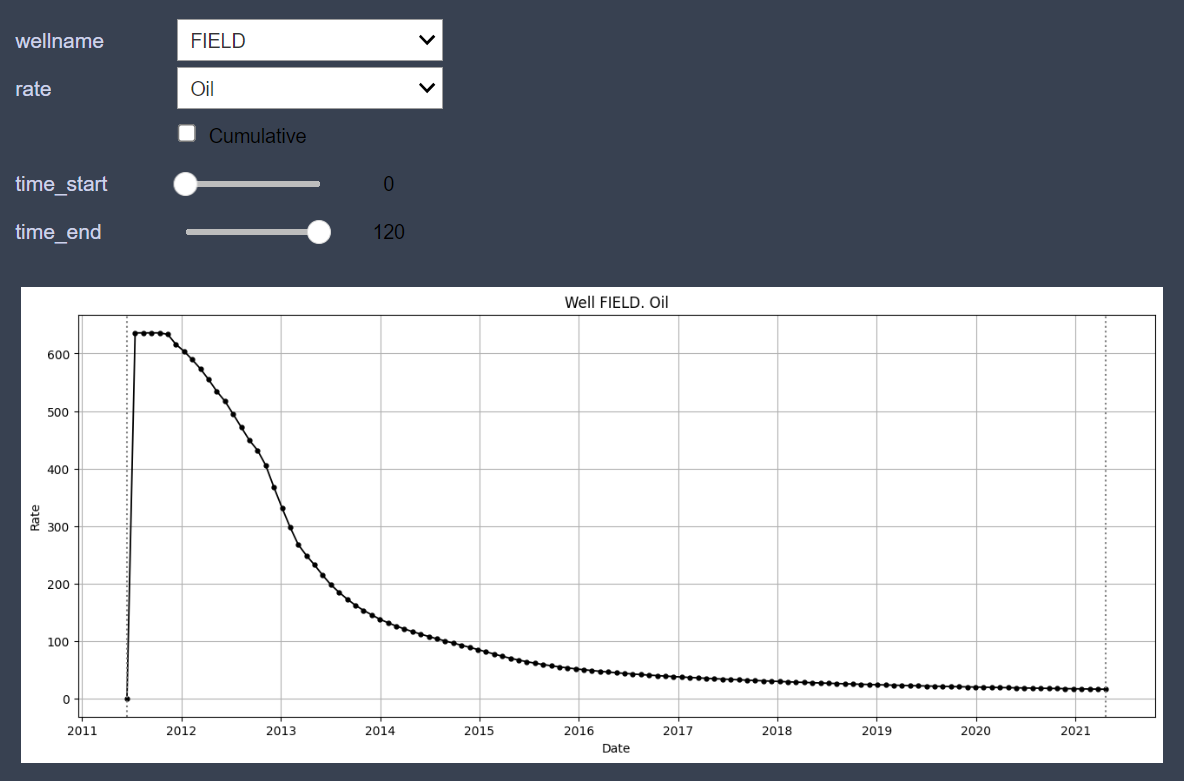 

and water production for the well `PROD2`:

<p>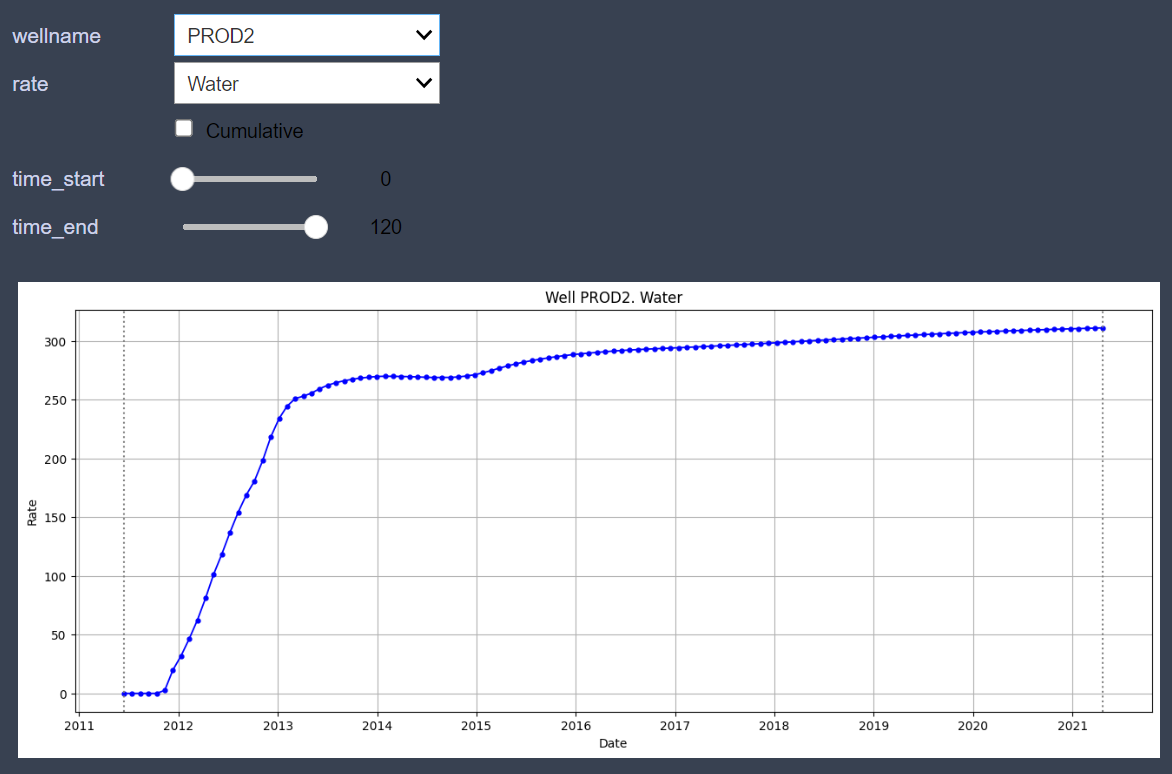

Done!